In [8]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from PIL import Image
import pickle as pk

datatrain=np.zeros((4000,64,64))
for p in range(2000):
    newname = "/Users/yangyibo/Desktop/MachineLearning/hw3/faces/face"+str(p)+".jpg"
    pil_im =Image.open(newname).convert('L')
    for m in range(64):
        for n in range(64):
            datatrain[p,n,m]= pil_im.getpixel((m,n))

for p in range(2000,4000):
    newname = "/Users/yangyibo/Desktop/MachineLearning/hw3/background/"+str(p-2000)+".jpg"
    pil_im =Image.open(newname).convert('L')
    for m in range(64):
        for n in range(64):
            datatrain[p,n,m]= pil_im.getpixel((m,n))

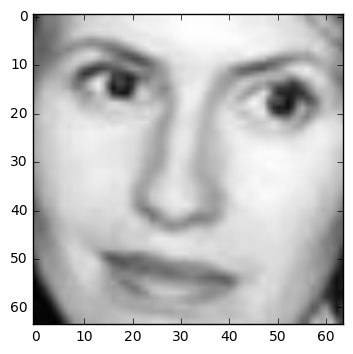

In [2]:
arr=datatrain[1004,:,:]
plt.imshow(arr,cmap='gray')
plt.show()

In [3]:
def getiimage():
    iimage=np.zeros((4000,65**2))
    ii=np.zeros((4000,65,65))
    s=np.zeros((4000,65,65))
    for m in range(4000):
        for p in range(1,65):
            s[m,p,0]=0
            for q in range(1,65):
                ii[m,0,q]=0
                s[m,p,q]=s[m,p,q-1]+datatrain[m,p-1,q-1]
                ii[m,p,q]=ii[m,p-1,q]+s[m,p,q]
    for m in range(4000):
        for p in range(65):
            for q in range(65):
                iimage[m,65*p+q]=ii[m,p,q]
    return ii

iimage=getiimage()

def FeatureTBL(minbound1,minbound2,maxb1,maxb2,step1,step2,size,n):
    x1 = [] ; y1 = []
    x2 = [] ; y2 = []
    x3 = [] ; y3 = []
    x4 = [] ; y4 = []
    
    for i in step1 * np.array(range((n+1)/step1)):
        tail = i
        for j in range((n-i)/(2*size)):
            tail = tail + 2*size
            if (tail-i) >= minbound1 and tail<=n and (tail-i) <= maxb1:
                x1.append(i)
                x4.append(tail)
                x3.append((i+tail)/2)
                x2.append((i+tail)/2)
            
    for k in step2 * np.array(range((n+1)/step2)):
        tail = k
        for l in range((n-k)/size):
            tail = tail + size
            if (tail-k) >= minbound2 and tail<=n and (tail-i) <= maxb2:
                y1.append(k)
                y4.append(tail)
    y2=y4;y3=y1

    print(len(x1))
    print(len(y1))
    print(2*len(x1)*len(y1))
    ans = []
    for i in range(len(x1)):
        for j in range(len(y1)):
            l1 = [x1[i],y1[j],x2[i],y2[j],x3[i],y3[j],x4[i],y4[j]]
            l2 = [y1[j],x1[i],y2[j],x2[i],y3[j],x3[i],y4[j],x4[i]]
            ans.append(l1)
            ans.append(l2)
    return(ans)

#featuretbl=np.array(FeatureTBL(1,1,8,8,2,2,4,64))
#print featuretbl.shape
#FeatN= featuretbl.shape[0]

##二维变一维
def changepp(x1,x2):
    return (x1*65+x2)
##一维变二维
def changepr(x):
    y=np.zeros((2,1))
    y[1]=x//65
    y[2]=x-65*(y[1])
    return y
def avg(i,x1,y1,x2,y2):
    s=(iimage[i,changepp(x1,y1)]+iimage[i,changepp(x2,y2)]-iimage[i,changepp(x1,y2)]-iimage[i,changepp(x2,y1)])/((x2-x1)*(y2-y1))
    return s
##返回feature里面白色减灰色（x是坐标，m是sample）
def getvolume(ft):
    black = np.mean(datatrain[:, ft[0]:ft[4], ft[1]:ft[5]], axis=(1,2))
    white = np.mean(datatrain[:, ft[2]:ft[6], ft[3]:ft[7]], axis=(1,2))
    return -black + white


    #return (iimage[m,changepp(x[2],x[3])]+iimage[m,changepp(x[0],x[1])]-iimage[m,changepp(x[2],x[1])]-iimage[m,changepp(x[4],x[5])]-iimage[m,changepp(x[6],x[7])]-iimage[m,changepp(x[4],x[5])]+iimage[m,changepp(x[4],x[7])]+iimage[m,changepp(x[2],x[3])])/(x[6]-x[0])/(x[7]-x[1])
##FFunct得到f_ij
#def getFFunct(Index,n):
#    Ng=Index.shape[0]
#    FFunctReturn=np.zeros(Ng)
#    for m in range(Ng):
#        FFunctReturn[m]=getvolume(featuretbl[n,:],Index[m])
#    return FFunctReturn
#def getFFunctPP(Index,n):
#    Ng=Index.shape[0]
#    FFunctReturn=np.zeros(Ng)
#    for m in range(Ng):
#        FFunctReturn[m]=getvolume(featuretbl[Index[m],:],n)
#    return FFunctReturn

In [4]:
def fct(a):
    fc = []
    b=64//a
    for t1 in range(b):
        for t2 in range(b):
            for s1 in range(t1+1,b):
                for s2 in range(t2+1,b):
                    fc.append(np.array([a*t1,a*t2,a*t1+a*(s1-t1)/2,a*t2,a*t1+a*(s1-t1)/2,a*s2,a*s1,a*s2]))
                    fc.append(np.array([a*t1,a*t2,a*t1,a*t2+a*(s2-t2)/2,a*s1,a*t2+a*(s2-t2)/2,a*s1,a*s2]))              
    return fc

In [5]:
featuretbl=np.array(fct(4))
FeatN= featuretbl.shape[0]
print datatrain[0,0:6,0:6]

[[ 192.  194.  196.  202.  218.  231.]
 [ 200.  201.  201.  205.  219.  233.]
 [ 212.  212.  210.  211.  222.  237.]
 [ 211.  213.  213.  214.  222.  235.]
 [ 203.  208.  212.  216.  225.  237.]
 [ 203.  210.  215.  221.  229.  239.]]


In [10]:
FFunct=np.zeros((FeatN,4000))
for m in range(FeatN):
    FFunct[m,:]=getvolume(featuretbl[m,:])
pk.dump(FFunct,open("FFunct","wb"))

In [14]:
FFunct=pk.load(open("FFunct","rb"))
##寻找一个弱分类器的p和theta
def getPtheta(FFunctKK,Tweight,reference):
    Ind=np.argsort(FFunctKK)
    orderweight=Tweight[Ind]
    reference=reference*2-1
    orderlabel=reference[Ind]
    FFunctorder=np.sort(FFunctKK)
    Tzheng=np.sum((orderlabel>0)*orderweight)
    Tfu=np.sum((orderlabel<0)*orderweight)
    Szheng=np.cumsum((orderlabel>0)*orderweight)
    Sfu=np.cumsum((orderlabel<0)*orderweight)
    signalorder=((Szheng+(Tfu-Sfu)<(Sfu+(Tzheng-Szheng)))*1-0.5)*2
    tempindex=np.argmin(np.amin(np.array([Szheng+(Tfu-Sfu),Sfu+(Tzheng-Szheng)]),axis=0))
    tempP=signalorder[tempindex]
    if (tempindex<(len(reference)-1)):
        Temptheta=(FFunctorder[tempindex]+FFunctorder[tempindex+1])/2
    else:
        Temptheta=FFunctorder[tempindex]
    esty=np.array(np.sign(tempP*FFunctKK-Temptheta))
    error=np.sum((esty!=reference)*Tweight)
    return Temptheta,tempP,error



In [15]:
def getWeakClassifier(weight,tempdataId):
    NL=tempdataId.shape[0]
    referencelabel=np.append(np.ones(2000),np.zeros(NL-2000))
    p=np.zeros(FeatN)
    theta=np.zeros(FeatN)
    epsilon=np.zeros(FeatN)
    for m in range(FeatN):
        if m%1000==0:
            print m
        #FFunctTemp=getvolume(featuretbl[m,:])
        #print FFunctTemp
        theta[m],p[m],epsilon[m]=getPtheta(FFunct[m,:],weight,referencelabel)
    #print epsilon
    J=np.argmin(epsilon)
    thetareturn=theta[J]
    preturn=p[J]
    currentMin=epsilon[J]
    featureIdxreturn=J
    #FFunctTemp=getFFunct(tempdataId,J)
    #referencelabel=reference*2-1
    #result=abs((np.sign(preturn*(FFunctTemp-thetareturn))+1)/2-referencelabel)
    
    return currentMin,preturn,thetareturn,featureIdxreturn


In [16]:
T=10
#N=5


#ThetaFinal=np.zeros(N)
#thetaFinal=np.zeros((N,T))
#alphaFinal=np.zeros((N,T))
#pFinal=np.zeros((N,T))
#featureIdxFinal=np.zeros((N,T))
thetaFinal=np.zeros(T)
alphaFinal=np.zeros(T)
pFinal=np.zeros(T)
featureIdxFinal=np.zeros(T)

#def OneStrongClassify(alphatt,htt,Nt):
#    return np.sign(sum(alphatt*htt))
    #return np.sign(sum(alphatt*htt)-ThetaFinal[Nt])

#def Classify(Index_in,Feature_in,p_in,theta_in,ref):
#    FFunct=getFFunctPP(Feature_in,Index_in)
#    result=abs((np.sign(p_in*FFunct-theta_in)+1)/2-ref)
#    return result


Idremain=np.array(range(4000))
#for n in range(N):
Long=Idremain.shape[0]
label=np.append(np.ones(2000),np.zeros(Long-2000))
label=label*2-1
pos=2000
neg=Long-2000
w=np.zeros((pos+neg))
w[range(0,pos)]=1.0/pos
w[range(pos,pos+neg)]=1.0/neg    
for t in range(T):
    w=w/np.sum(w)
    print w
    hcurrentMin,pFinal[t],thetaFinal[t],featureIdxFinal[t]=getWeakClassifier(w,Idremain)
    print hcurrentMin,pFinal[t],thetaFinal[t],featureIdxFinal[t]
    FFunctTempora=FFunct[featureIdxFinal[t],:]
    httt=np.sign(pFinal[t]*(FFunctTempora-thetaFinal[t]))
    alphaFinal[t]=0.5*np.log((1-hcurrentMin)/hcurrentMin)
    z=2*np.sqrt((1-hcurrentMin)*hcurrentMin)
    if t==T:
        break
    else:
        w=np.exp(-alphaFinal[t]*label*httt)*w/z


[ 0.00025  0.00025  0.00025 ...,  0.00025  0.00025  0.00025]
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
0.07025 1.0 12.0096153846 10904.0
[ 0.00013444  0.00013444  0.00013444 ...,  0.00013444  0.00013444
  0.00013444]
0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
0.190029750086 1.0 16.128125 5187.0
[  8.29936305e-05   8.29936305e-05   8.29936305e-05 ...,   8.29936305e-05
   8.29936305e-05   8.29936305e-05]
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
0.229667472766 1.0 13.9583333333 11.0
[  1.80682161e-04   5.38687044e-05   5.38687044e-05 ...,   5.38687044e-05
   5.38687044e-05   5.38687044e-05]
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
0.286772145751 1.0 7.06944444444 27800.0
[  3.15027389e-04   3.77640218e-05   9.39224838e-05 ...,   3.77640218e-05
   3.77640218e-05   3.77640218e-05]
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
140

In [17]:
print thetaFinal
print alphaFinal
print pFinal
print featureIdxFinal

[ 12.00961538  16.128125    13.95833333   7.06944444  -1.81944444   5.9875
   7.04166667   9.03125     -1.15364583  -1.7037037 ]
[ 1.29142771  0.72490844  0.60509489  0.45555648  0.49946446  0.45303596
  0.44752737  0.40654848  0.41263789  0.38761429]
[ 1.  1.  1.  1. -1.  1.  1.  1. -1. -1.]
[  1.09040000e+04   5.18700000e+03   1.10000000e+01   2.78000000e+04
   1.63940000e+04   2.32500000e+03   1.27360000e+04   2.81150000e+04
   2.06500000e+03   2.06600000e+03]


In [23]:
pk.dump(thetaFinal,open("thetaFinal","wb"))
pk.dump(alphaFinal,open("alphaFinal","wb"))
pk.dump(pFinal,open("pFinal","wb"))
pk.dump(featureIdxFinal,open("featureIdxFinal","wb"))

In [172]:
thetaFinal=pk.load(open("thetaFinal","rb"))
alphaFinal=pk.load(open("alphaFinal","rb"))
pFinal=pk.load(open("pFinal","rb"))
featureIdxFinal=pk.load(open("featureIdxFinal","rb"))

In [173]:
def printBound(Finalfig_in,n1,m1):
    Finalfig_in[n1:n1+3,m1:m1+64]=255
    Finalfig_in[n1+61:n1+64,m1:m1+64]=255
    Finalfig_in[n1:n1+64,m1:m1+3]=255
    Finalfig_in[n1:n1+64,m1+62:m1+65]=255
    Indicator[n1:n1+64,m1:m1+64]=0
    return Finalfig_in

In [174]:
print thetaFinal
print alphaFinal
print pFinal
print featureIdxFinal

[ 12.00961538  16.128125    13.95833333   7.06944444  -1.81944444   5.9875
   7.04166667   9.03125     -1.15364583  -1.7037037 ]
[ 1.29142771  0.72490844  0.60509489  0.45555648  0.49946446  0.45303596
  0.44752737  0.40654848  0.41263789  0.38761429]
[ 1.  1.  1.  1. -1.  1.  1.  1. -1. -1.]
[  1.09040000e+04   5.18700000e+03   1.10000000e+01   2.78000000e+04
   1.63940000e+04   2.32500000e+03   1.27360000e+04   2.81150000e+04
   2.06500000e+03   2.06600000e+03]


In [163]:
thetaFinal=np.array([12.009615384615387,-16.96875,-6.9104166666666593,-8.9187500000000099,15.15625,5.6527777777777715,13.693749999999998,-4.0138888888888804,-9.59375,-8.3541666666666679])
alphaFinal=np.array([1.2914277122956621,0.80468508264812377,0.75072330962638023,0.6841032381419313,0.59478753476816659,0.47927410259279984,0.54558499233906554,0.44834707448360167,0.42081395551257222,0.40500846950896324])
pFinal=np.array([1,-1,-1,-1,1,1,1,-1,-1,-1])


In [175]:
Newfeaturetbl=np.zeros((T,8))
for q in range(T):
    Newfeaturetbl[q]=featuretbl[featureIdxFinal[q],:]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [176]:
def newgetvolume(ff,ttimage):
    black = np.mean(ttimage[ff[0]:ff[4], ff[1]:ff[5]], axis=(0,1))
    white = np.mean(ttimage[ff[2]:ff[6], ff[3]:ff[7]], axis=(0,1))
    return -black + white

In [177]:
#def newavg(x1,y1,x2,y2,tempiimage):
#    s=(tempiimage[changepp(x1,y1)]+tempiimage[changepp(x2,y2)]-tempiimage[changepp(x1,y2)]-tempiimage[changepp(x2,y1)])/((x2-x1)*(y2-y1))
#    return s
##返回feature里面白色减灰色（x是坐标，m是sample）
#def newgetvolume(f,ttimage):
#    value = -newavg(f[0],f[1],f[4],f[5],ttimage)+newavg(f[2],f[3],f[6],f[7].ttimage)
#    return value
#def newgetvolume(x,iimage_in):
#    return iimage_in[changepp(x[2],x[3])]+iimage_in[changepp(x[0],x[1])]-iimage_in[changepp(x[0],x[3])]-iimage_in[changepp(x[2],x[1])]-iimage_in[changepp(x[6],x[7])]-iimage_in[changepp(x[4],x[5])]+iimage_in[changepp(x[4],x[7])]+iimage_in[changepp(x[6],x[5])]/(x[6]-x[0])/(x[7]-x[1])

#def newClassify(F_in,theta_in,P_in):
#    return np.sign(F_in-theta_in)*P_in
def StrongClassify(F_input):
    h_tt=np.sign(F_input-thetaFinal)*pFinal
    temp1=np.sum(alphaFinal*h_tt)
    return np.sign(temp1)

def Judge(Fig_in,xlabel,ylabel):
    if Doornot(xlabel,ylabel)==1:
        return 2
    Fre=np.zeros(T)
    for i in range(T):
        Fre[i]=newgetvolume(Newfeaturetbl[i,:],Fig_in)
    return StrongClassify(Fre)
def Doornot(n1,m1):
    Tempmatrix=Indicator[n1:n1+64,m1:m1+64]
    if np.sum(Tempmatrix)<0.8*64**2:
        return 1
    else:
        return 0


In [178]:
Xr=1600
Yr=1280
Indicator=np.ones((Xr,Yr))
for i in range(4000):
    print Judge(datatrain[i,:,:],0,0)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0

In [ ]:
##返回Detect Feature里面白色减灰色（x是坐标，m是sample）
#def getvolumetemp(x,iimageTemp):
#    return iimageTemp[changepp(x[2],x[3])]+iimageTemp[changepp(x[0],x[1])]-iimageTemp[changepp(x[0],x[3])]-iimageTemp[changepp(x[2],x[1])]-iimageTemp[changepp(x[6],x[7])]-iimageTemp[changepp(x[4],x[5])]+iimageTemp[changepp(x[4],x[7])]+iimageTemp[changepp(x[6],x[5])]


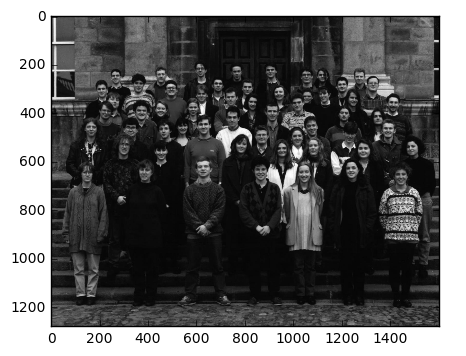

In [179]:
Finalpicture=np.zeros((1280,1600))
newname = "/Users/yangyibo/Desktop/MachineLearning/hw3/class.jpg"
pil_im =Image.open(newname).convert('L')
for m in range(1600):
    for n in range(1280):
        Finalpicture[n,m]= pil_im.getpixel((m,n))
arr=Finalpicture
plt.imshow(arr,cmap='gray')
plt.show()

In [1]:
Xr=1280
Yr=1600
Indicator=np.ones((Xr,Yr))
Detect=np.zeros((64,64))
for m in range(0,Xr-64,10):
    for n in range(0,Yr-64,10):
        ##对于小窗口进行处理
        Detect=Finalpicture[m:m+64,n:n+64]
        if Judge(Detect,m,n)==1:##圈出来，并且往后跳30个格子
            Finalpicture=printBound(Finalpicture,m+5,n+5)
    arr=Finalpicture
    plt.figure(figsize=(10,10))
    plt.imshow(arr,cmap='gray')
    plt.show()      
           

NameError: name 'np' is not defined

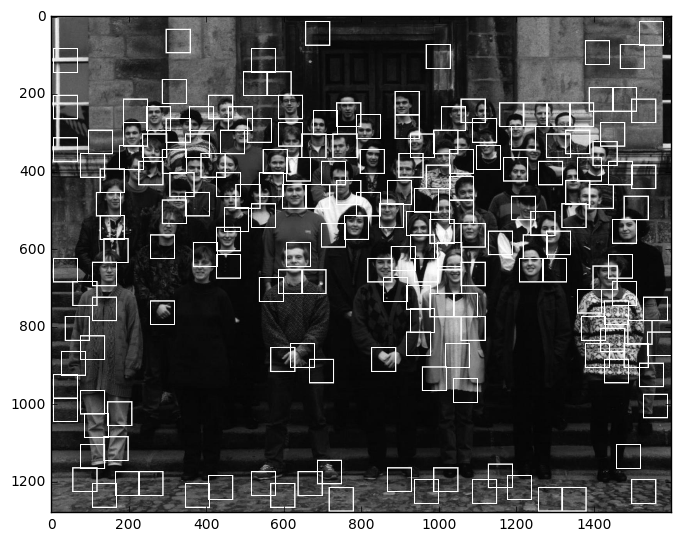

In [185]:
arr=Finalpicture
plt.figure(figsize=(8,10))
plt.imshow(arr,cmap='gray')
plt.show()  